In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

## More Yahoo Finance and Plotting

In [2]:
stock = yf.Ticker('RY.TO')

In [3]:
# View other information about the stock
stock.info

{'zip': 'M5J 2J5',
 'sector': 'Financial Services',
 'fullTimeEmployees': 85887,
 'longBusinessSummary': "Royal Bank of Canada operates as a diversified financial service company worldwide. The company's Personal & Commercial Banking segment offers checking and savings accounts, home equity financing, personal lending, private banking, indirect lending, mutual funds and self-directed brokerage accounts, guaranteed investment certificates, credit cards, and payment products and solutions; and lending, leasing, deposit, investment, foreign exchange, cash management, auto dealer financing, trade products, and services to small and medium-sized commercial businesses. This segment offers financial products and services through branches, automated teller machines, and mobile sales network. Its Wealth Management segment provides a suite of advice-based solutions and strategies to high net worth and ultra-high net worth individuals, and institutional clients. The company's Insurance segment of

All this data is stored in this `.info` as a dictionary. Some important info that we can extract from these tickers is:

In [4]:
# Industry
stock.info['industry']

'Banks—Diversified'

In [5]:
# Sector
stock.info['sector']

'Financial Services'

In [6]:
# Name
stock.info['longName']

'Royal Bank of Canada'

## Getting Historical Data

In [45]:
# Get one year of stock data
hist = stock.history(start='2020-01-01', end='2021-01-05')

Now what if we wanted to plot our data for the whole year but only have tickers for every six months? Let's do this with closing prices.

Then we know that we would want the first available data that we have for:
* Jan 2020
* June 2020
* Jan 2021

In [8]:
# Get close as a DataFrame
close = pd.DataFrame(hist['Close'])

close.reset_index(inplace=True)

We want to collect our locations of these tickers as Dates since our x-axis is Dates.

In [9]:
# First location
close.head()

,Date,Close
0,2020-01-02,96.219185
1,2020-01-03,95.866074
2,2020-01-06,95.884674
3,2020-01-07,95.921844
4,2020-01-08,96.683792


In [10]:
# Last location
close.tail()

,Date,Close
248,2020-12-24,102.009789
249,2020-12-29,102.291763
250,2020-12-30,101.922272
251,2020-12-31,101.698624
252,2021-01-04,101.786140


In [11]:
# Middle location
close[(close.Date <= '2020-06-03') & (close.Date >= '2020-05-31')]

,Date,Close
104,2020-06-01,86.746719
105,2020-06-02,89.018784
106,2020-06-03,89.703239


Our tickers would be ['2020-01-02', '2020-06-01', '2021-01-04']

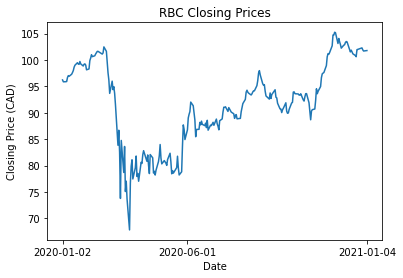

In [12]:
plt.plot(close.Date, close.Close)

plt.xticks(['2020-01-02', '2020-06-01', '2021-01-04'])
plt.title('RBC Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (CAD)')

plt.show()

Next, we'll go through how to plot subplots. In our case, we'll plot the Open and Close prices for the year of data we collected.

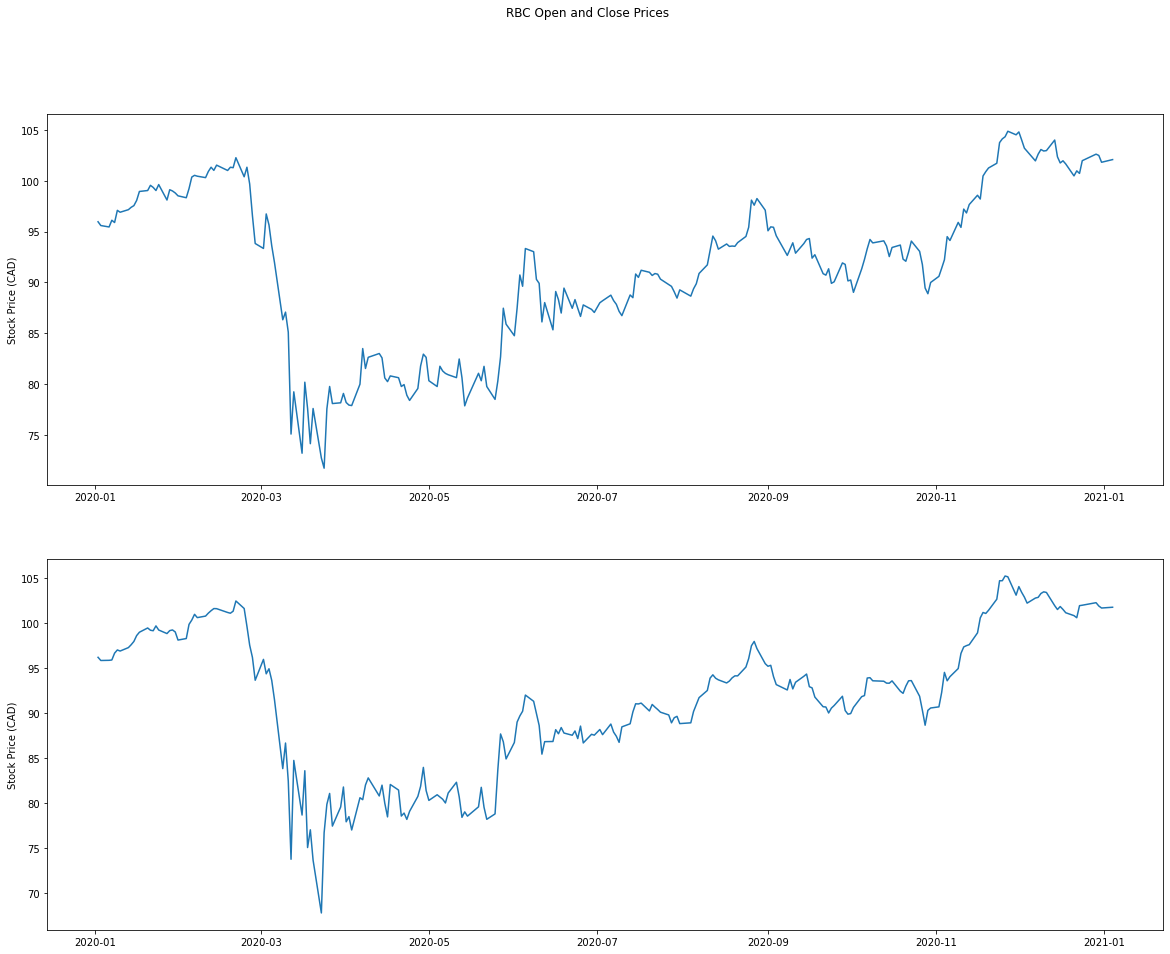

In [13]:
# Specify number of rows and columns (2,1) and define axes for each plot
fig, ((ax1), (ax2)) = plt.subplots(2,1)
fig.set_size_inches(20, 15)


# Overall title
fig.suptitle('RBC Open and Close Prices')

# Subplot 1 
ax1.plot(hist.index, hist.Open)

# Subplot 2
ax2.plot(hist.index, hist.Close)

ax1.set_ylabel("Stock Price (CAD)")
ax2.set_ylabel("Stock Price (CAD)")

plt.show()

**NOTE**: If you wanted to set the tickers for a subplot, you need to call the specific axes, i.e. `ax1` and use `.set_xticks(indices_list)` instead of `plt.xticks`. This only works for one plot.

Now, let's say we are interested in seeing the differences between the Open and Close prices. We can visualize this distribution using a scatter plot. We want to see how this distribution varies around the horizontal y=0 line so we plot a blue scatter plot and a red horizontal line.

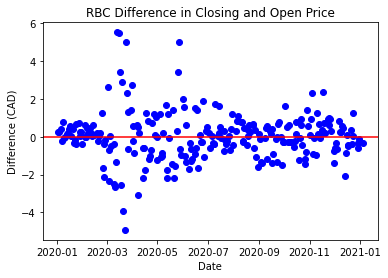

In [14]:
# Plot the data
plt.scatter(hist.index, hist.Close - hist.Open, color='b')
plt.axhline(y=0, color='r', linestyle = '-')

# Set axis and title
plt.title('RBC Difference in Closing and Open Price')
plt.xlabel('Date')
plt.ylabel('Difference (CAD)')
plt.show()

We can see here that our prices are usually around the 0-2; however in some cases there is a lot of variation between our closing and open prices.

## More DataFrames

You can also read in data as a DataFrame, for example from a csv file. 

In [15]:
# read in daily activity csv
activity = pd.read_csv('daily_activity.csv', index_col='Date')

In [16]:
# View our data
activity.head()

,Walk,Swim,Running
Date,,,
2021-01-01,89,36,26
2021-01-02,78,39,29
2021-01-03,68,39,27
2021-01-04,93,30,26
2021-01-05,68,26,26


In [17]:
# Columns
activity.columns

Index(['Walk', 'Swim', 'Running'], dtype='object')

In [18]:
# Reset the index 
activity.reset_index(inplace=True)

In [19]:
activity.head()

,Date,Walk,Swim,Running
0,2021-01-01,89,36,26
1,2021-01-02,78,39,29
2,2021-01-03,68,39,27
3,2021-01-04,93,30,26
4,2021-01-05,68,26,26


As you can see, it creates a new column in the DataFrame for what used to be the index.

In [20]:
# Set the index to be date
activity.set_index('Date', inplace=True)

The `inplace=True` parameter updates your current DataFrame. Without that parameter, the default is False. 

In [21]:
# View only land activity
activity[['Walk', 'Running']]

,Walk,Running
Date,,
2021-01-01,89,26
2021-01-02,78,29
2021-01-03,68,27
2021-01-04,93,26
2021-01-05,68,26
...,...,...
2021-04-26,68,26
2021-04-27,78,27
2021-04-28,78,27


Now, let's say that we are a workout enthusiast and we also have the time to work out in the gym but that isn't stored in this dataframe. We read in another dataframe called `gym.csv` that stores the time we spend in the gym.

In [22]:
gym = pd.read_csv('gym.csv')

In [23]:
# View our data
gym.head()

,Unnamed: 0,Date,Time
0,0,2021-01-01,27
1,1,2021-01-02,30
2,2,2021-01-03,27
3,3,2021-01-04,25
4,4,2021-01-05,26


In [24]:
# Select columns
gym = gym[['Date', 'Time']]

Now we want all of our data in one table, so we need to join the two tables together. To do this, we need to have the same indices so that we can do an inner join on the index, which basically means that we are matching our data on the dates that both tables have. Hence, if any date does not appear in one of the tables, it would not show up in our inner join. 

To do this, we need to set our index to Date so that it matches the activity table. Then we use `pd.concat([df1, df2])` to join where we specify the parameter `join=inner` to show it is in an inner join and `axis=1` to show we are adding another column into our new table.

In [25]:
# Set the index
gym.set_index('Date', inplace=True)

In [26]:
# Join the tables
daily_activity = pd.concat([activity, gym], join='inner', axis=1)

daily_activity.head()

,Walk,Swim,Running,Time
Date,,,,
2021-01-01,89,36,26,27
2021-01-02,78,39,29,30
2021-01-03,68,39,27,27
2021-01-04,93,30,26,25
2021-01-05,68,26,26,26


In [27]:
len(daily_activity), len(activity), len(gym)

(120, 120, 120)

We can see that we have a new column called Time from our Gym table and that we had all the same dates between the two tables so they matched up. Next, `Time` makes sense as a column when it is just a gym table, but with this new table, we want to rename our columns so that it is `Gym` instead. 

In [28]:
# Rename column
daily_activity.columns = ['Walk', 'Swim', 'Run', 'Gym']

You simply pass in a list of names to rename the columns by setting `df.columns`. In this case, your list of column names needs to match the number of columns in your table.

Now, lastly, I want to create a new DataFrame that summarizes the average number of minutes I walked, swam, ran and went to the gym for this time period. We will do this by creating a dictionary with our new values.

In [29]:
activity_dic = {'Walk': np.mean(daily_activity.Walk),
                'Run': np.mean(daily_activity.Run),
                'Swim': np.mean(daily_activity.Swim),
                'Gym': np.mean(daily_activity.Gym)
               }

In [30]:
activity_stats= pd.DataFrame(activity_dic, index=[0])

Now what if you wanted to have the activity as a row and the mean as the column? You would transpose your matrix in order to do that.

In [31]:
activity_stats = activity_stats.T

activity_stats

,0
Walk,76.041667
Run,27.458333
Swim,32.391667
Gym,25.333333


In [32]:
# Rename column
activity_stats.columns = ['mean']

This was mainly to show you that sometimes you need to transpose your data when creating a DataFrame from a dictionary and that basically means swapping your rows and columns. 

A faster way to get the means for each activity type would be to do the following:

In [33]:
pd.DataFrame(daily_activity.describe().loc['mean'])

,mean
Walk,76.041667
Swim,32.391667
Run,27.458333
Gym,25.333333


### Data Types

Lastly, we want to look into how to convert datatypes, specifically dates.

In [34]:
hist.reset_index().dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits             int64
dtype: object

In [35]:
daily_activity.reset_index().dtypes

Date    object
Walk     int64
Swim     int64
Run      int64
Gym      int64
dtype: object

You'll see that for our dates with Yahoo Finance we have datetimes; however, with our data from the csv, we have dates as an object. What if we wanted to convert our dates to datetime? 

This can be done very easily with DataFrames!

In [36]:
daily_activity.index = pd.to_datetime(daily_activity.index)

In [37]:
daily_activity.reset_index().dtypes

Date    datetime64[ns]
Walk             int64
Swim             int64
Run              int64
Gym              int64
dtype: object

All done! 

Remember to check data types when you are trying to join data together using either concat or inner joins. For example, when we joined our daily activity and gym data together, we were able to since both Date indices were an `object`; however, if one was an `object` while the other was a `datetime`, we would have to convert it.

For graphing purposes, datetime is more ideal.

# Exercises

Exercise 1: Graph a 2x1 subplot with open and close prices. Display the quarterly dates for the x-axis.

Exercise 2: Calculate the median time spent on each activity and add it to the `activity_stats` DataFrame as a new column.

Exercise 3: Calculate the average total exercise time that you spend during this month. Which date did you spend the most time exercising? What about the least time exercising? 

Exercise 4: What is your monthly average time spent exercising?

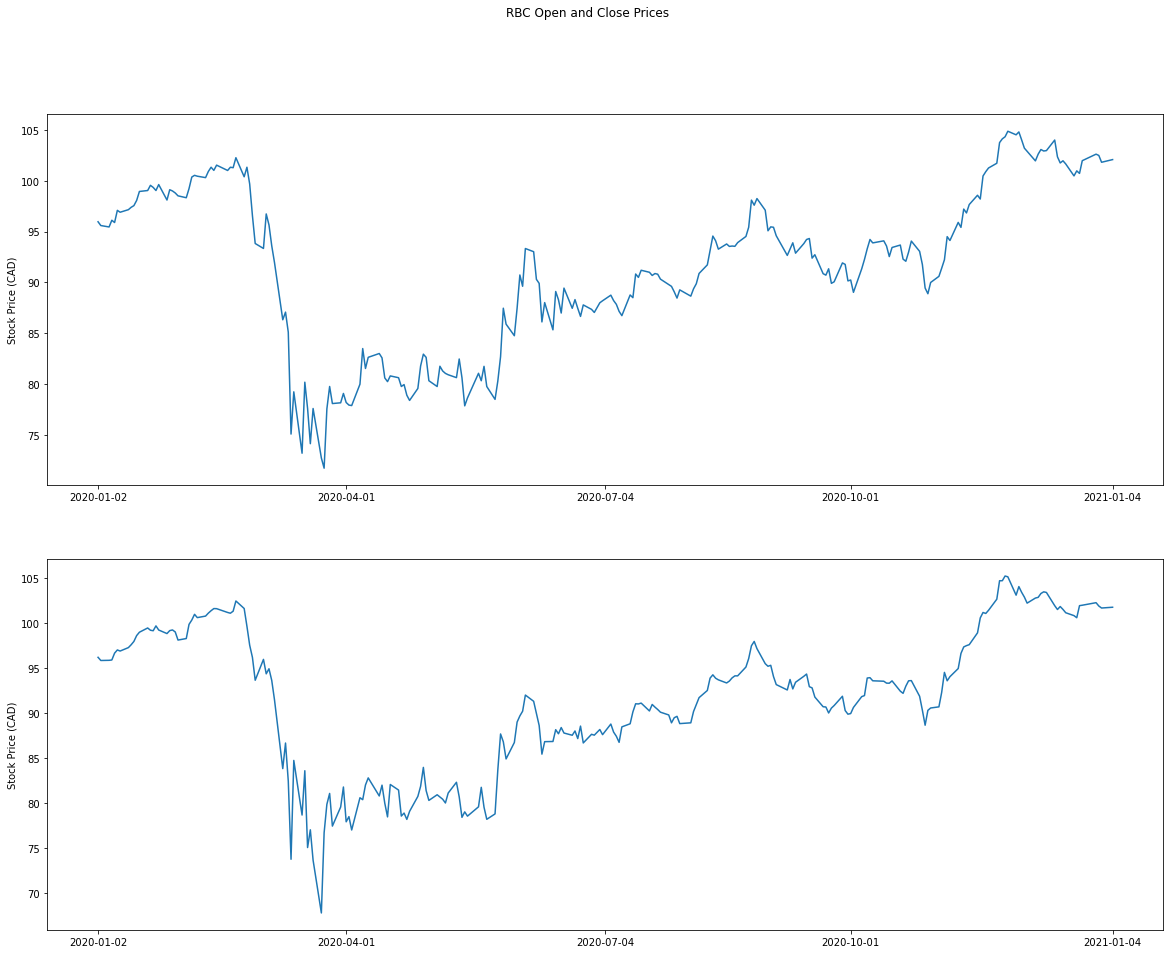

In [38]:
# Exercise 1 
fig, ((ax1), (ax2)) = plt.subplots(2,1)
fig.set_size_inches(20, 15)

# Overall title
fig.suptitle('RBC Open and Close Prices')

# Subplot 1 
ax1.plot(hist.index, hist.Open)
ax1.set_xticks(['2020-01-02', '2020-04-01', '2020-07-04', '2020-10-01', '2021-01-04'])

# Subplot 2
ax2.plot(hist.index, hist.Close)
ax2.set_xticks(['2020-01-02', '2020-04-01', '2020-07-04', '2020-10-01', '2021-01-04'])


ax1.set_ylabel("Stock Price (CAD)")
ax2.set_ylabel("Stock Price (CAD)")

plt.show()

In [39]:
# Exercise 2 
activity_stats['median'] = daily_activity.describe().loc['50%']

activity_stats.head()

,mean,median
Walk,76.041667,77.0
Run,27.458333,27.0
Swim,32.391667,33.0
Gym,25.333333,25.0


In [40]:
# Exercise 3
daily_activity['total'] = daily_activity.sum(axis=1)

daily_activity.head()

,Walk,Swim,Run,Gym,total
Date,,,,,
2021-01-01,89,36,26,27,178
2021-01-02,78,39,29,30,176
2021-01-03,68,39,27,27,161
2021-01-04,93,30,26,25,174
2021-01-05,68,26,26,26,146


In [41]:
# Max time spent exercising
daily_activity[daily_activity.total == daily_activity.total.max()]

,Walk,Swim,Run,Gym,total
Date,,,,,
2021-02-08,94,38,29,26,187


In [42]:
# Min time spent exercising
daily_activity[daily_activity.total == daily_activity.total.min()]

,Walk,Swim,Run,Gym,total
Date,,,,,
2021-02-04,55,28,29,22,134


In [43]:
# Exercise 4
daily_activity['month'] = daily_activity.index.month

daily_activity.groupby('month').mean()['total']

month
1    161.096774
2    163.321429
3    159.258065
4    161.433333
Name: total, dtype: float64